#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [3]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [4]:
df_flights = pd.read_csv(r'..\..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
filter = df_flights[['taxi_out','dep_time','flights']]
filter.head()

,taxi_out,dep_time,flights
0,9.0,2005.0,1
1,11.0,2200.0,1
2,11.0,646.0,1
3,10.0,737.0,1
4,13.0,1821.0,1


In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [7]:
filter = clean_dataset(filter)

C:\Users\User\AppData\Local\Temp\ipykernel_28232\1442344577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28232\1442344577.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [8]:
filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99338 entries, 0 to 100997
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   taxi_out  99338 non-null  float64
 1   dep_time  99338 non-null  float64
 2   flights   99338 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


In [9]:
taxi_by_dep_time = filter.groupby('dep_time', as_index=False).mean('taxi_out').sort_values('dep_time')

<AxesSubplot: xlabel='dep_time', ylabel='taxi_out'>

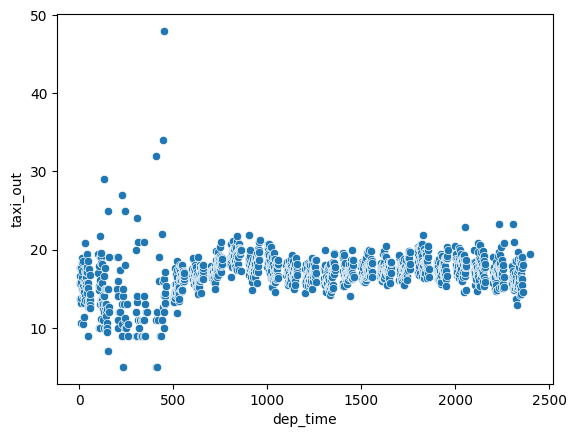

In [10]:
sns.scatterplot(taxi_by_dep_time, x='dep_time', y='taxi_out')

In [11]:
df_flights['flights'].unique()

array([1], dtype=int64)

In [12]:
filter['dep_time_grouped'] = pd.cut(df_flights['dep_time'], 24, labels=range(1,25))
filter.head()

,taxi_out,dep_time,flights,dep_time_grouped
0,9.0,2005.0,1.0,21
1,11.0,2200.0,1.0,22
2,11.0,646.0,1.0,7
3,10.0,737.0,1.0,8
4,13.0,1821.0,1.0,19


In [13]:
filter['dep_time_grouped'].value_counts()

13    6221
7     6183
18    6167
9     6070
12    6055
8     6017
16    5962
11    5941
10    5886
15    5792
17    5660
19    5638
14    5490
20    5412
21    4645
6     4054
22    3441
23    2734
24    1017
1      455
5      262
2      161
3       43
4       32
Name: dep_time_grouped, dtype: int64

In [14]:
filter.groupby('dep_time_grouped').mean('taxi_out')

,taxi_out,dep_time,flights
dep_time_grouped,,,
1,15.487912,31.043956,1.0
2,14.807453,125.136646,1.0
3,13.046512,230.906977,1.0
4,12.625000,325.968750,1.0
5,14.450382,457.854962,1.0
6,16.293784,545.859645,1.0
7,16.772117,633.725538,1.0
8,17.734585,732.099551,1.0
9,19.197529,831.560461,1.0


In [15]:
taxi_by_traffic_volume = filter.groupby('dep_time_grouped', as_index=False).agg(
                        {'taxi_out':'mean', 
                         'flights':'sum'
                         })
taxi_by_traffic_volume

,dep_time_grouped,taxi_out,flights
0,1,15.487912,455.0
1,2,14.807453,161.0
2,3,13.046512,43.0
3,4,12.625000,32.0
4,5,14.450382,262.0
5,6,16.293784,4054.0
6,7,16.772117,6183.0
7,8,17.734585,6017.0
8,9,19.197529,6070.0
9,10,18.159361,5886.0


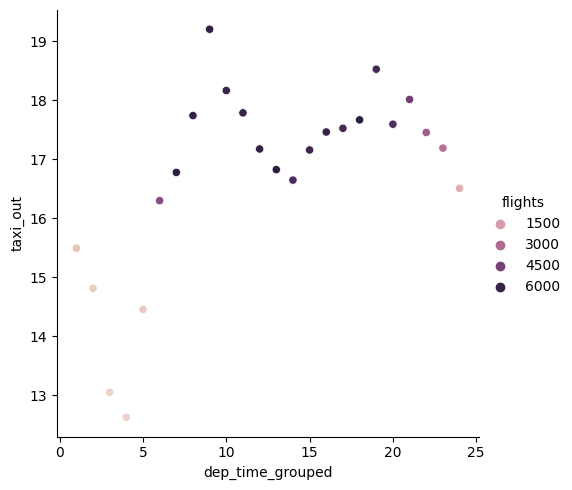

In [16]:
g = sns.relplot(data=taxi_by_traffic_volume, x='dep_time_grouped', y='taxi_out', hue='flights')

Early morning flights tend to have a lower mean taxi time, which corresponds to a much lower volume of flights